<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Load the dataset into a dataframe.


In [32]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


Text(0, 0.5, 'Freq. Count')

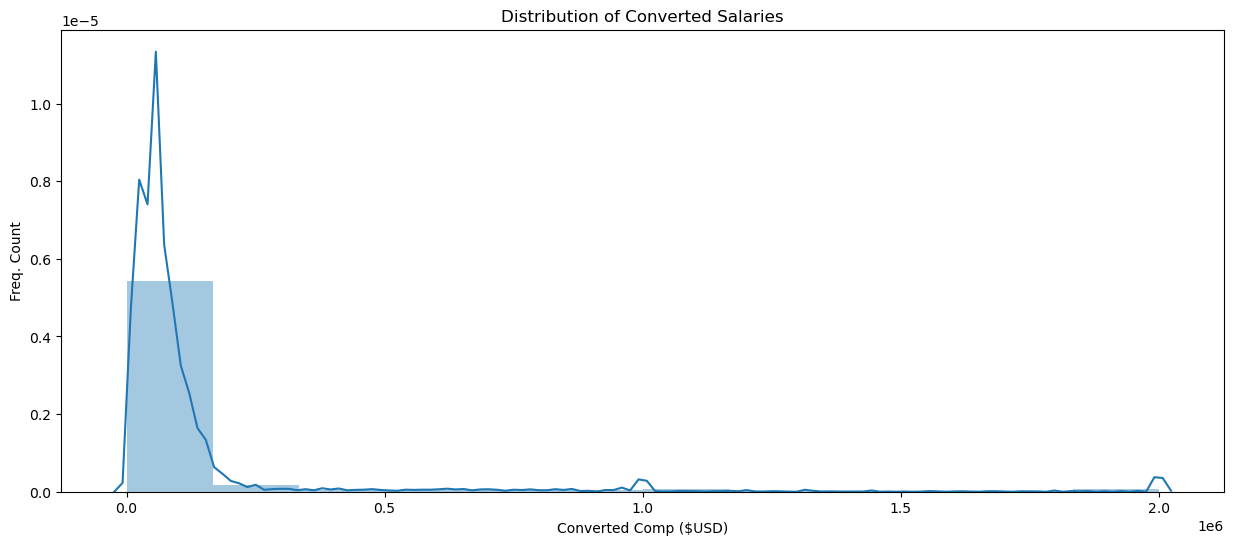

In [43]:
median = df['ConvertedComp'].median()
df['ConvertedComp'] = df['ConvertedComp'].fillna(median)

from statsmodels.formula.api import ols
import io
import requests


bins = np.linspace(min(df['ConvertedComp']), max(df['ConvertedComp']), 13)
plt.figure(figsize=(15, 6), edgecolor='blue')
sns.distplot(df['ConvertedComp'], kde=True, bins=bins)

plt.title('Distribution of Converted Salaries')
plt.xlabel('Converted Comp ($USD)')
plt.ylabel('Freq. Count')

Text(0, 0.5, 'Freq. Count')

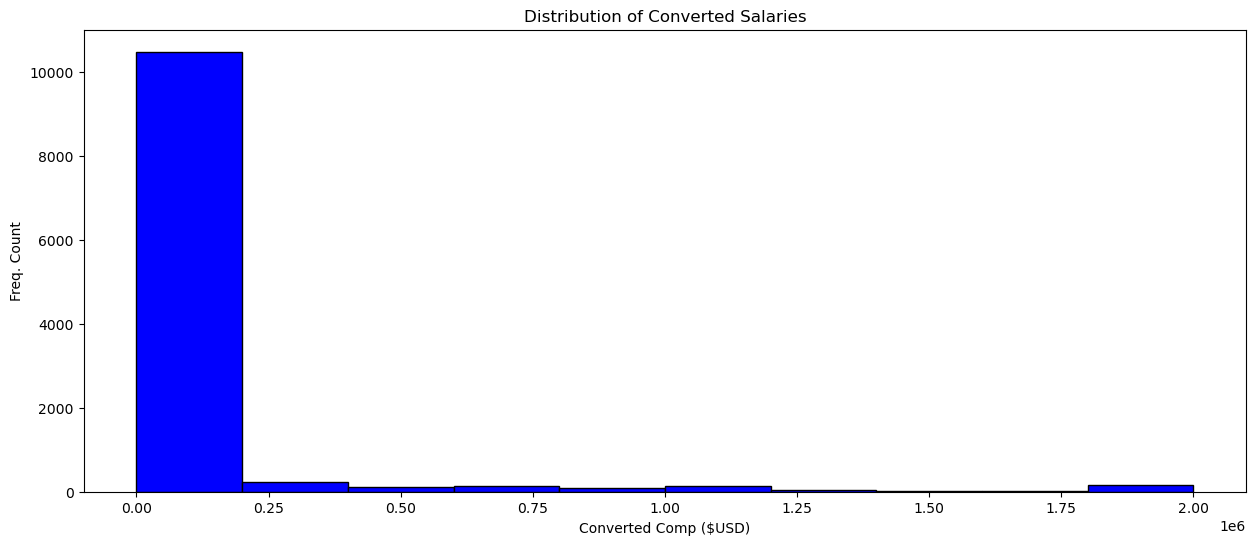

In [44]:
import matplotlib.pyplot as plt

bins = np.linspace(min(df['ConvertedComp']), max(df['ConvertedComp']), 13)
plt.figure(figsize=(15, 6),edgecolor='blue')
plt.hist(df['ConvertedComp'], color = 'blue', edgecolor = 'black', bins = int(2000000/200000))

plt.title('Distribution of Converted Salaries')
plt.xlabel('Converted Comp ($USD)')
plt.ylabel('Freq. Count')

In [45]:
print(df['ConvertedComp'].dtypes)

float64


In [46]:
print(df.dtypes)

Respondent       int64
MainBranch      object
Hobbyist        object
OpenSourcer     object
OpenSource      object
                 ...  
Sexuality       object
Ethnicity       object
Dependents      object
SurveyLength    object
SurveyEase      object
Length: 85, dtype: object


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11398 non-null  int64  
 1   MainBranch              11398 non-null  object 
 2   Hobbyist                11398 non-null  object 
 3   OpenSourcer             11398 non-null  object 
 4   OpenSource              11317 non-null  object 
 5   Employment              11398 non-null  object 
 6   Country                 11398 non-null  object 
 7   Student                 11347 non-null  object 
 8   EdLevel                 11286 non-null  object 
 9   UndergradMajor          10661 non-null  object 
 10  EduOther                11234 non-null  object 
 11  OrgSize                 11302 non-null  object 
 12  DevType                 11333 non-null  object 
 13  YearsCode               11389 non-null  object 
 14  Age1stCode              11385 non-null

Plot the histogram for the column `ConvertedComp`.


Text(0.5, 0, 'Salaries ($USD)')

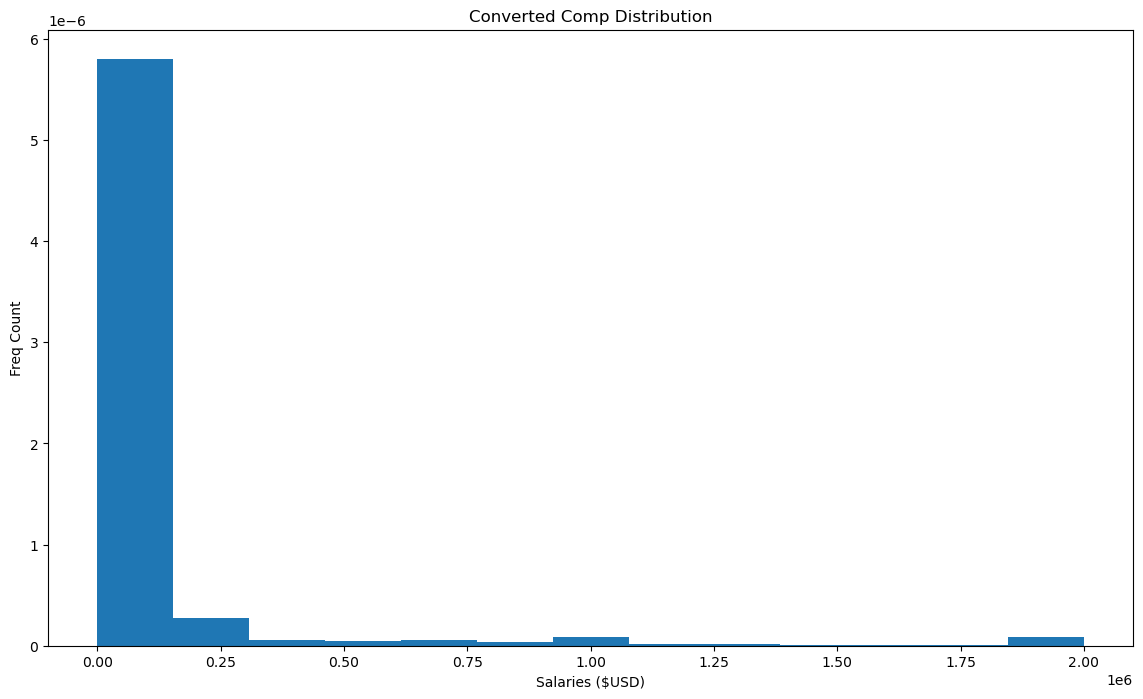

In [34]:
plt.figure(figsize=(14, 8), edgecolor='blue')
plt.hist(df['ConvertedComp'], density=True, bins=13)
plt.title('Converted Comp Distribution')
plt.ylabel('Freq Count')
plt.xlabel('Salaries ($USD)')

What is the median of the column `ConvertedComp`?


In [35]:
print('Median of the column ConvertedComp is {}'.format(df['ConvertedComp'].median()))

Median of the column ConvertedComp is 57745.0


In [48]:
dfCopy = df.copy()

In [49]:
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,11398.000000,1.058900e+04,1.139800e+04,11276.000000,8972.000000,11111.000000
mean,12490.392437,7.570477e+05,1.263096e+05,42.064606,4.781071,30.778895
std,7235.461999,9.705598e+06,2.846750e+05,24.672741,4.567060,7.393686
min,4.000000,0.000000e+00,0.000000e+00,3.000000,0.000000,16.000000
25%,6264.250000,2.500000e+04,2.901600e+04,40.000000,2.000000,25.000000
50%,12484.000000,6.500000e+04,5.774500e+04,40.000000,4.000000,29.000000
75%,18784.750000,1.200000e+05,9.500000e+04,43.000000,5.000000,35.000000
max,25142.000000,7.000000e+08,2.000000e+06,1012.000000,99.000000,99.000000


In [50]:
#Code to assess NAN in Numeric fields

if df['WorkWeekHrs'].isnull().sum():  #See if any Missing Values
    mean_work = df['WorkWeekHrs'].mean()
    df['WorkWeekHrs'].replace(np.nan, mean_work, inplace=True)
    
if df['Age'].isnull().sum():  #See if any Missing Values
    mean_age = df['Age'].mean()
    df['Age'].replace(np.nan, mean_age, inplace=True)
    
if df['CompTotal'].isnull().sum():  #See if any Missing Values
    mean_comp_total = df['CompTotal'].mean()
    df['CompTotal'].replace(np.nan, mean_comp_total, inplace=True)
    
if df['ConvertedComp'].isnull().sum():  #See if any Missing Values
    mean_conv_comp = df['ConvertedComp'].mean()
    df['ConvertedComp'].replace(np.nan, mean_conv_comp, inplace=True)
    
if df['CodeRevHrs'].isnull().sum():  #See if any Missing Values
    mean_code = df['CodeRevHrs'].mean()
    df['CodeRevHrs'].replace(np.nan, mean_code, inplace=True)

In [51]:
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,11398.000000,1.139800e+04,1.139800e+04,11398.000000,11398.000000,11398.000000
mean,12490.392437,7.570477e+05,1.263096e+05,42.064606,4.781071,30.778895
std,7235.461999,9.354789e+06,2.846750e+05,24.540330,4.051929,7.299999
min,4.000000,0.000000e+00,0.000000e+00,3.000000,0.000000,16.000000
25%,6264.250000,2.800000e+04,2.901600e+04,40.000000,2.000000,26.000000
50%,12484.000000,7.000000e+04,5.774500e+04,40.000000,4.781071,29.000000
75%,18784.750000,1.400000e+05,9.500000e+04,42.500000,5.000000,34.000000
max,25142.000000,7.000000e+08,2.000000e+06,1012.000000,99.000000,99.000000


In [52]:
#  Replacing nan values in AGE Column

mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)

In [53]:
df['Age'].isna().sum()

0

In [54]:
print('Median of Age colunn is {}'.format(df['Age'].median()))

Median of Age colunn is 29.0


How many responders identified themselves only as a **Man**?


In [55]:
man_identity = df['Gender'].value_counts()
man_identity

print('Number of only man responders is {}'.format(man_identity))

Number of only man responders is Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64


In [56]:
man_identity = df['Gender'].value_counts()[0]
man_identity

print('Number of Only Man/Male Responders is {}'.format(man_identity))

Number of Only Man/Male Responders is 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [57]:
woman_identity = df[['ConvertedComp', 'Gender']].groupby(['Gender'], as_index=False).median()
woman_identity

,Gender,ConvertedComp
0,Man,57745.0
1,"Man;Non-binary, genderqueer, or gender non-con...",59520.0
2,"Non-binary, genderqueer, or gender non-conforming",66000.0
3,Woman,57745.0
4,Woman;Man,25887.0
5,"Woman;Man;Non-binary, genderqueer, or gender n...",30244.0
6,"Woman;Non-binary, genderqueer, or gender non-c...",65535.5


In [58]:
woman_identity[woman_identity['Gender']=='Woman']

,Gender,ConvertedComp
3,Woman,57745.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [59]:
df['Age'].describe()

from numpy import percentile

quartiles = percentile(df['Age'], [25, 50, 75])

Age_min, Age_max = df['Age'].min(), df['Age'].max()

print('Min: %.3f' % Age_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % Age_max)

Min: 16.000
Q1: 26.000
Median: 29.000
Q3: 34.000
Max: 99.000


Plot a histogram of the column `Age`.


Text(0.5, 0, 'Age')

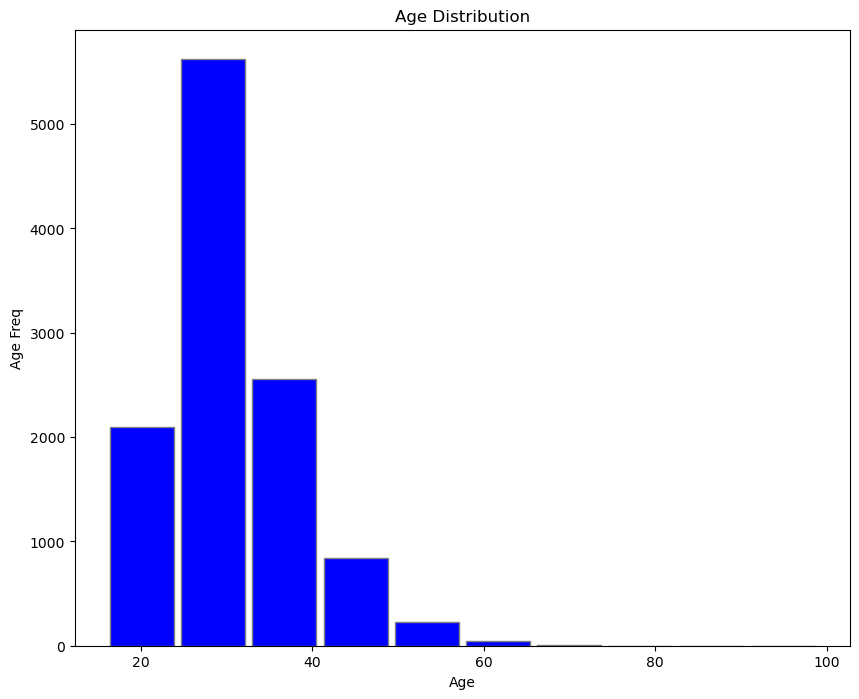

In [61]:
bin_width=8
bins = round((df['Age'].max() - df['Age'].min()) / bin_width)
hist_age = df.hist(column='Age', bins=bins, grid=False, figsize=(10,8), color='blue', edgecolor='grey', zorder=2, rwidth=0.9)
plt.title('Age Distribution')
plt.ylabel('Age Freq')
plt.xlabel('Age')

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


Text(0.5, 0, 'ConvertedComp ($USD)')

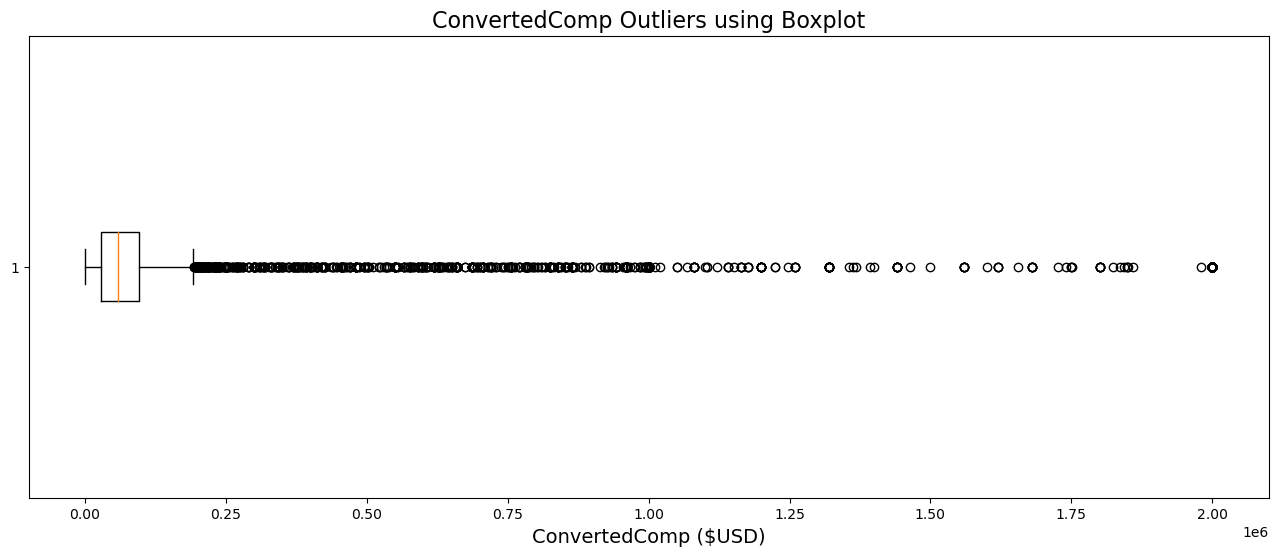

In [20]:
plt.figure(figsize = (16, 6))
plt.boxplot(x=df['ConvertedComp'], vert=False)
plt.title('ConvertedComp Outliers using Boxplot', size=16)
plt.xlabel('ConvertedComp ($USD)', size=14)

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [63]:
q3, q1 = np.percentile(df['ConvertedComp'], [75 ,25])
IQR = q3 - q1

print('Inter Quartile Range for ConvertedComp column is {}'.format(IQR))

Inter Quartile Range for ConvertedComp column is 65984.0


Find out the upper and lower bounds.


In [64]:
upper_bound = print('Upper bound is {}'.format(q3 + 1.5*IQR))
upper_bound

low_bound = print('Lower bound is {}'.format(q1 - 1.5*IQR))
low_bound

Upper bound is 193976.0
Lower bound is -69960.0


Identify how many outliers are there in the `ConvertedComp` column.


In [65]:
lower_outliers = (df['ConvertedComp'] <= (q1 - 1.5 * IQR)).sum()
print('Number of outliers below Q1 is {}'.format(lower_outliers))

upper_outliers = (df['ConvertedComp'] >= (q3 + 1.5 * IQR)).sum()
print('Number of outliers above Q3 is {}'.format(upper_outliers))

total_outliers = lower_outliers + upper_outliers
print('Total number of outliers is {}'.format(total_outliers))

Number of outliers below Q1 is 0
Number of outliers above Q3 is 933
Total number of outliers is 933


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [68]:
upper = np.where(df['ConvertedComp'] >= (q3 + 1.5*IQR))
lower = np.where(df['ConvertedComp'] <= (q1 - 1.5*IQR))

mask = (df['ConvertedComp'] < (q1 - 1.5 * IQR)) | (df['ConvertedComp'] > (q3 + 1.5 * IQR))
df[mask] = np.nan
df['ConvertedComp'].mean()

dfNew = df.copy()

In [69]:
dfNew.shape

(11398, 85)

In [70]:
dfNew['ConvertedComp'].drop(upper[0], inplace = True)
dfNew['ConvertedComp'].drop(lower[0], inplace = True)
 
print("New Data now have Shape: ", dfNew.shape)
print("Orig Data now have Shape: ", df.shape)

New Data now have Shape:  (11398, 85)
Orig Data now have Shape:  (11398, 85)


In [71]:
dfNew['ConvertedComp']

0         61000.0
1         95179.0
2         90000.0
3             NaN
4         65277.0
           ...   
11393    130000.0
11394     19880.0
11395    105000.0
11396     80371.0
11397     57745.0
Name: ConvertedComp, Length: 11398, dtype: float64

In [72]:
if dfNew['WorkWeekHrs'].isnull().sum():
    mean_work = dfNew['WorkWeekHrs'].mean()
    dfNew['WorkWeekHrs'].replace(np.nan, mean_work, inplace=True)
    
if dfNew['Age'].isnull().sum():
    mean_age = dfNew['Age'].mean()
    dfNew['Age'].replace(np.nan, mean_age, inplace=True)
    
if dfNew['CompTotal'].isnull().sum():
    mean_comp_total = dfNew['CompTotal'].mean()
    dfNew['CompTotal'].replace(np.nan, mean_comp_total, inplace=True)
    
if dfNew['ConvertedComp'].isnull().sum():
    mean_conv_comp = dfNew['ConvertedComp'].mean()
    dfNew['ConvertedComp'].replace(np.nan, mean_conv_comp, inplace=True)
    
if dfNew['CodeRevHrs'].isnull().sum():
    mean_code = dfNew['CodeRevHrs'].mean()
    dfNew['CodeRevHrs'].replace(np.nan, mean_code, inplace=True)

In [73]:
print('ConvertedComp mean after dropping otliers {}'.format(dfNew['ConvertedComp'].mean(),2))

ConvertedComp mean after dropping otliers 58992.50339225978


In [74]:
dfNew.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,10465.000000,1.139800e+04,11398.000000,11398.000000,11398.000000,11398.000000
mean,12494.160057,7.297042e+05,58992.503392,41.876188,4.802223,30.625512
std,7234.905154,6.630982e+06,38849.606048,23.208439,3.945248,6.941294
min,4.000000,0.000000e+00,0.000000,3.000000,0.000000,16.000000
25%,6261.000000,3.000000e+04,29016.000000,40.000000,3.000000,26.000000
50%,12485.000000,7.900000e+04,57745.000000,40.000000,4.781071,30.000000
75%,18802.000000,1.923750e+05,78000.000000,42.000000,5.000000,33.000000
max,25142.000000,3.900000e+08,192500.000000,1012.000000,99.000000,99.000000


In [75]:
print('Median of ConvertedComp colunn is {}'.format(dfNew['ConvertedComp'].median()))

Median of ConvertedComp colunn is 57745.0


Text(0.5, 0, 'ConvertedComp ($USD)')

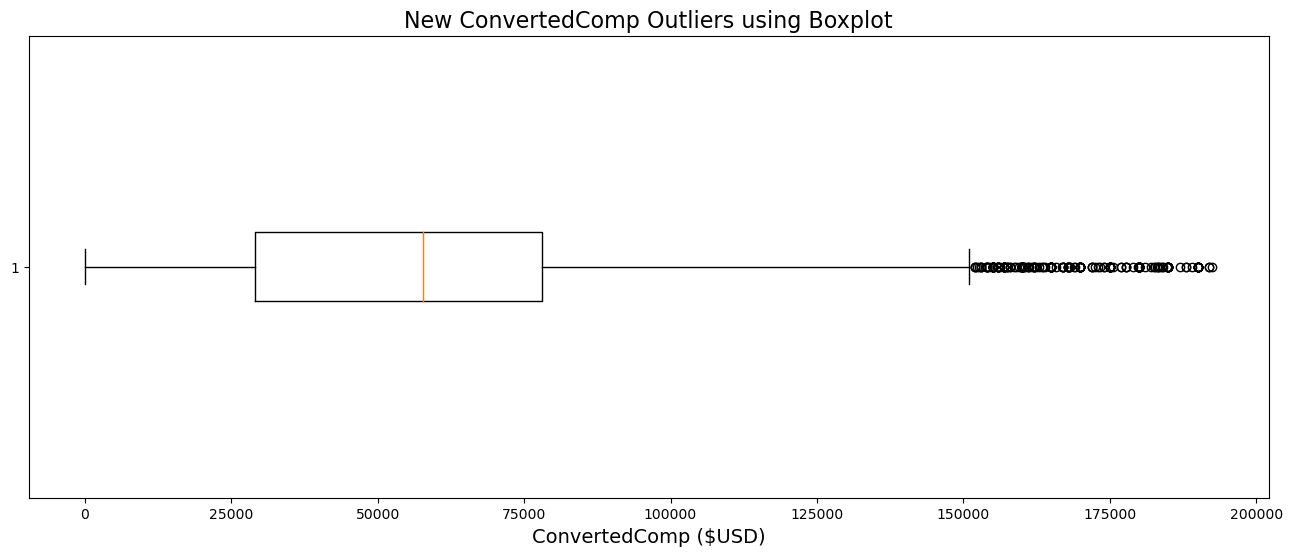

In [76]:
plt.figure(figsize = (16, 6))
plt.boxplot(x=dfNew['ConvertedComp'], vert=False)
plt.title('New ConvertedComp Outliers using Boxplot', size=16)
plt.xlabel('ConvertedComp ($USD)', size=14)

In [78]:
lower_outliers = (dfNew['ConvertedComp'] <= (q1 - 1.5 * IQR)).sum()
print('Number of outliers below Q1 is {}'.format(lower_outliers))
      
upper_outliers = (dfNew['ConvertedComp'] >= (q3 + 1.5 * IQR)).sum() 
print('Numberr of outliers above Q3 is {}'.format(upper_outliers))
      
total_outliers = lower_outliers + upper_outliers
print('Total outliers are {}'.format(total_outliers))

Number of outliers below Q1 is 0
Numberr of outliers above Q3 is 0
Total outliers are 0


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [29]:
if dfNew['WorkWeekHrs'].isnull().sum():
    meanWork = dfNew['WorkWeekHrs'].mean()
    dfNew['WorkWeekHrs'].replace(np.nan, meanWork, inplace=True)
    
if df['Age'].isnull().sum():
    meanAge = df['Age'].mean()
    df['Age'].replace(np.nan, meanAge, inplace=True)
    
if df['CompTotal'].isnull().sum():
    meanComp = df['CompTotal'].mean()
    df['CompTotal'].replace(np.nan, meanComp, inplace=True)
    
if df['ConvertedComp'].isnull().sum():
    meanCComp = df['ConvertedComp'].mean()
    df['ConvertedComp'].replace(np.nan, meanCComp, inplace=True)
    
if df['CodeRevHrs'].isnull().sum():
    meanCode = df['CodeRevHrs'].mean()
    df['CodeRevHrs'].replace(np.nan, meanCode, inplace=True)
    
df.drop(['Respondent'], axis = 1, inplace=True)
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`


,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
CompTotal,1.00,-0.06,0.00,0.02,0.01
ConvertedComp,-0.06,1.00,0.03,-0.08,0.38
WorkWeekHrs,0.00,0.03,1.00,0.03,0.04
CodeRevHrs,0.02,-0.08,0.03,1.00,-0.01
Age,0.01,0.38,0.04,-0.01,1.00


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
